In [4]:
import pandas as pd
import numpy as np
import openpyxl
import os

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf #회귀식 도출 위한 모듈

import matplotlib.pyplot as plt
import sklearn

In [2]:
# to get current working dir.
print(os.getcwd())

c:\Users\leeju\Documents\GitHub\capstone_team7


In [121]:
pathX = r"C:\Users\leeju\Documents\GitHub\capstone_team7\data\X"
pathY = r"C:\Users\leeju\Documents\GitHub\capstone_team7\data\Y"

# sch_district : 학구ID 별(동 표기) 특목/자사 비율

## 서울시 중학교 별 특목자사고 진학 학생 수(grad)

In [32]:
filename = "졸업생의 진로 현황_2018.xlsx"
df = pd.read_excel(pathX+"\\"+filename,sheet_name = 0, header=0)

In [33]:
big_col = list(df.columns)
small_col = list(df.iloc[0])

In [34]:
big_col[3] = '학교코드'
small_col[3] = '학교코드'

In [35]:
df.columns = [big_col,small_col]

In [37]:
# 첫번째 row 삭제
df = df.drop([0,1])
df.reset_index(drop=True, inplace=True)

In [38]:
# df: 서울시, 일반중학교, 졸업자 있는 학교만
df = df[df['시도교육청']['시도교육청'] == "서울특별시교육청"]
df = df[df['학교급코드']['학교급코드'] == '03']
df = df[df['졸업자.2']['합계'] != '0']

In [39]:
df.columns

MultiIndex([(              '시도교육청', '시도교육청'),
            (              '지역교육청', '지역교육청'),
            (                 '지역',    '지역'),
            (               '학교코드',  '학교코드'),
            (                '학교명',   '학교명'),
            (              '학교급코드', '학교급코드'),
            (               '설립구분',  '설립구분'),
            (                '주야간',   '주야간'),
            (               '제외여부',  '제외여부'),
            (               '제외사유',  '제외사유'),
            (                '졸업자',     '남'),
            (              '졸업자.1',     '여'),
            (              '졸업자.2',    '합계'),
            (            '일반고 진학자',     '남'),
            (          '일반고 진학자.1',     '여'),
            (          '일반고 진학자.2',    '합계'),
            (          '일반고 진학자.3',    '비율'),
            (           '특성화고 진학자',     '남'),
            (         '특성화고 진학자.1',     '여'),
            (         '특성화고 진학자.2',    '합계'),
            (         '특성화고 진학자.3',    '비율'),
            (     '(특수목적고)과학고 진학자'

In [40]:
# 필요한 컬럼만 수집
df = df[[('학교명','학교명'),('지역교육청','지역교육청'),
    ('졸업자', '남'),('졸업자.1', '여'),('졸업자.2','합계'),
    ('(특수목적고)과학고 진학자', '남'),('(특수목적고)과학고 진학자.1', '여'),('(특수목적고)과학고 진학자.2','합계'),
    ('(특수목적고)외고ㆍ국제고 진학자', '남'),('(특수목적고)외고ㆍ국제고 진학자.1', '여'),('(특수목적고)외고ㆍ국제고 진학자.2','합계'),
    ('(자율고)자율형사립고 진학자', '남'),('(자율고)자율형사립고 진학자.1', '여'),('(자율고)자율형사립고 진학자.2','합계')]]

In [41]:
df.columns = ['학교명','지역교육청','졸업자_남','졸업자_여','졸업자_합',
             '과학고_남','과학고_여','과학고_합',
             '외고국제고_남','외고국제고_여','외고국제고_합',
             '자사고_남','자사고_여','자사고_합']

In [42]:
# 데이터 타입 수정(str -> int)
numuric_col = list(df.columns)[2:]
for col in numuric_col:
    df[col] = pd.to_numeric(df[col])

In [43]:
df['특목자사_합'] = df['과학고_합']+df['외고국제고_합']+df['자사고_합']

In [44]:
# grad: 서울시 중학교 별 특목자사고 진학 학생 수
grad = df

In [45]:
grad

,학교명,지역교육청,졸업자_남,졸업자_여,졸업자_합,과학고_남,과학고_여,과학고_합,외고국제고_남,외고국제고_여,외고국제고_합,자사고_남,자사고_여,자사고_합,특목자사_합
0,경원중학교,서울특별시강남서초교육지원청,141,169,310,5,0,5,0,4,4,59,69,128,137
1,구룡중학교,서울특별시강남서초교육지원청,139,117,256,3,0,3,2,2,4,26,5,31,38
2,압구정중학교,서울특별시강남서초교육지원청,60,56,116,2,0,2,3,2,5,30,20,50,57
3,단국대학교사범대학부속중학교,서울특별시강남서초교육지원청,191,0,191,3,0,3,4,0,4,46,0,46,53
4,대명중학교,서울특별시강남서초교육지원청,147,158,305,2,0,2,1,6,7,51,6,57,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,길음중학교,서울특별시성북강북교육지원청,125,134,259,3,1,4,2,10,12,39,12,51,67
376,마곡중학교,서울특별시강서양천교육지원청,102,105,207,1,1,2,1,3,4,7,3,10,16
377,숭곡중학교,서울특별시성북강북교육지원청,78,99,177,0,0,0,0,3,3,15,1,16,19
378,세곡중학교,서울특별시강남서초교육지원청,120,131,251,0,0,0,1,2,3,13,2,15,18


## 학교별 학구ID 가져오기(grp_id)

In [46]:
filename = "한국교원대학교_학교학구도연계정보_20210325.xlsx"
df = pd.read_excel(pathX+"\\"+filename,sheet_name = 0, header=0)

In [47]:
grp_id = df[['학구ID','학교명']]

In [48]:
grp_id.head(3)

,학구ID,학교명
0,Z000200001,정화여자중학교
1,Z000200001,경희중학교
2,Z000200001,경희여자중학교


## 학구ID 별 특목자사고 진학 비율(grp_sum)

In [49]:
new_grad = pd.merge(grad, grp_id, on='학교명', how='left')

In [50]:
new_grad

,학교명,지역교육청,졸업자_남,졸업자_여,졸업자_합,과학고_남,과학고_여,과학고_합,외고국제고_남,외고국제고_여,외고국제고_합,자사고_남,자사고_여,자사고_합,특목자사_합,학구ID
0,경원중학교,서울특별시강남서초교육지원청,141,169,310,5,0,5,0,4,4,59,69,128,137,Z000200035
1,구룡중학교,서울특별시강남서초교육지원청,139,117,256,3,0,3,2,2,4,26,5,31,38,Z000200034
2,압구정중학교,서울특별시강남서초교육지원청,60,56,116,2,0,2,3,2,5,30,20,50,57,Z000200033
3,단국대학교사범대학부속중학교,서울특별시강남서초교육지원청,191,0,191,3,0,3,4,0,4,46,0,46,53,Z000200034
4,대명중학교,서울특별시강남서초교육지원청,147,158,305,2,0,2,1,6,7,51,6,57,66,Z000200034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,길음중학교,서울특별시성북강북교육지원청,125,134,259,3,1,4,2,10,12,39,12,51,67,Z000200018
376,마곡중학교,서울특별시강서양천교육지원청,102,105,207,1,1,2,1,3,4,7,3,10,16,Z000200029
377,숭곡중학교,서울특별시성북강북교육지원청,78,99,177,0,0,0,0,3,3,15,1,16,19,Z000200046
378,세곡중학교,서울특별시강남서초교육지원청,120,131,251,0,0,0,1,2,3,13,2,15,18,Z000200034


In [51]:
grp_id_sum = new_grad.groupby('학구ID')[['졸업자_합','특목자사_합']].sum()

In [52]:
grp_id_sum.reset_index(drop=False, inplace=True)

In [53]:
grp_id_sum.columns = ['학구ID','졸업자_합_학군별','특목자사_합_학군별']

In [54]:
grp_id_sum.head(3)

,학구ID,졸업자_합_학군별,특목자사_합_학군별
0,Z000200001,876,205
1,Z000200002,1589,249
2,Z000200003,1718,99


## 동별 학군 기준정보(sch_district)

In [55]:
filename = "서울시_동별_중학교학군.xlsx"
sch_district = pd.read_excel(pathX+"\\"+filename,sheet_name = 0, header=0)

In [56]:
sch_district.columns = ['자치구','행정동','학구ID']

In [57]:
sch_district

,자치구,행정동,학구ID
0,강남구,개포1동,Z000200034
1,강남구,개포2동,Z000200034
2,강남구,개포4동,Z000200034
3,강남구,논현1동,Z000200033
4,강남구,논현2동,Z000200033
...,...,...,...
420,중랑구,상봉2동,Z000200003
421,중랑구,신내1동,Z000200003
422,중랑구,신내2동,Z000200003
423,중랑구,중화1동,Z000200003


In [58]:
print(len(sch_district), len(grp_id_sum))

425 46


In [59]:
sch_district = pd.merge(sch_district, grp_id_sum, on='학구ID', how='inner')

In [60]:
sch_district

,자치구,행정동,학구ID,졸업자_합_학군별,특목자사_합_학군별
0,강남구,개포1동,Z000200034,3730,804
1,강남구,개포2동,Z000200034,3730,804
2,강남구,개포4동,Z000200034,3730,804
3,강남구,대치1동,Z000200034,3730,804
4,강남구,대치2동,Z000200034,3730,804
...,...,...,...,...,...
420,중랑구,면목3.8동,Z000200004,839,29
421,중랑구,면목4동,Z000200004,839,29
422,중랑구,면목5동,Z000200004,839,29
423,중랑구,면목7동,Z000200004,839,29


In [61]:
# 표기법 수정
idx = sch_district[sch_district.행정동=="종로5·6가동"].index
sch_district.loc[idx,'행정동'] = '종로5.6가동'

# 17년 서울시 전세 데이터(jeonse)

진학률 데이터가 18년꺼여서, 18년에 졸업하는 애들이 중학교 입학~학교 다니는.. 14,15,16,17.. 이런 데이터를 봐야할 것 같긴 하지만. 일단은 17년꺼만 봐보자 

In [62]:
file_list_all = list(['아파트(전월세)_실거래가_201607_201706.xlsx','아파트(전월세)_실거래가_201707_201806.xlsx'])

In [63]:
file_list_all

['아파트(전월세)_실거래가_201607_201706.xlsx', '아파트(전월세)_실거래가_201707_201806.xlsx']

In [64]:
df = pd.DataFrame()

for file in file_list_all:
    print(file)
    data = pd.read_excel(pathY+"\\"+file, header=0, skiprows=16)
    df = pd.concat([df,data])

아파트(전월세)_실거래가_201607_201706.xlsx


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


아파트(전월세)_실거래가_201707_201806.xlsx


In [65]:
# total: 320,006
# 전세만: 218,846
# 2017년 거래만: 106,270
df = df[df['전월세구분']=='전세']
df = df.drop('월세(만원)',axis=1)  # 월세 컬럼 삭제
df = df.drop('전월세구분',axis=1)  # 전월세구분 컬럼 삭제

In [66]:
len(df)

218846

In [67]:
df.head(3)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,보증금(만원),층,건축년도,도로명
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201607,26,"50,000",9,1988,언주로 103
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201608,17,"43,000",7,1988,언주로 103
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201609,13,"38,000",3,1988,언주로 103


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218846 entries, 2 to 157964
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   시군구      218846 non-null  object 
 1   번지       218498 non-null  object 
 2   본번       218801 non-null  float64
 3   부번       218801 non-null  float64
 4   단지명      218846 non-null  object 
 5   전용면적(㎡)  218846 non-null  float64
 6   계약년월     218846 non-null  int64  
 7   계약일      218846 non-null  int64  
 8   보증금(만원)  218846 non-null  object 
 9   층        218846 non-null  int64  
 10  건축년도     218846 non-null  int64  
 11  도로명      218846 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 21.7+ MB


In [69]:
# 쉼표 제거 및 데이터 타입 변환(numeric), 단위 만원 -> 원 으로 변경
df['보증금(만원)'] = pd.to_numeric(df['보증금(만원)'].apply(lambda x: x.replace(',', '')))
df['보증금(만원)'] = df['보증금(만원)'] * 10000

In [70]:
# 데이터 분리: 계약년월 -> 계약년도, 계약월
# 계약일자: datetime 타입의 계약일

In [71]:
df['계약년월_str'] = df['계약년월'].apply(lambda x: str(x))
df['계약년도'] = df['계약년월_str'].apply(lambda x: x[:4])
df['계약월'] = df['계약년월_str'].apply(lambda x: x[4:])
df['계약일자'] = df.계약년월*100 + df.계약일
df['계약일자'] = pd.to_datetime(df['계약일자'].apply(lambda x:str(x)))

In [72]:
# 2017년 거래만 filter
df = df[df.계약년도=='2017']

In [73]:
# 시,구,동 컬럼 생성
df['시'] = df.시군구.str.split(' ').str[0]
df['구'] = df.시군구.str.split(' ').str[1]
df['동'] = df.시군구.str.split(' ').str[2]

In [74]:
# 도로명주소 분리: 도로명, 건물번호
df.rename(columns = {'도로명':'도로명주소'}, inplace=True)

In [75]:
df['도로명'] = df.도로명주소.str.split(' ').str[0]
df['건물번호'] = df.도로명주소.str.split(' ').str[1]

In [76]:
df.dtypes

시군구                 object
번지                  object
본번                 float64
부번                 float64
단지명                 object
전용면적(㎡)            float64
계약년월                 int64
계약일                  int64
보증금(만원)              int64
층                    int64
건축년도                 int64
도로명주소               object
계약년월_str            object
계약년도                object
계약월                 object
계약일자        datetime64[ns]
시                   object
구                   object
동                   object
도로명                 object
건물번호                object
dtype: object

In [77]:
# 컬럼명 재정의
df.columns = ['시군구','번지','본번','부번','단지명','전용면적',
              '계약년월','계약일','거래금액','층',
              '건축년도','도로명주소',
              '계약년월_str','계약년도','계약월','계약일자',
              '시','구','동','도로명','건물번호']

In [78]:
df = df[['시', '구', '동',
         '도로명주소','도로명','건물번호',
         '번지','본번','부번',
         '층','단지명','전용면적','건축년도',
         '계약년월','계약년도','계약월','계약일','계약일자',
         '거래금액']]  #,'거래금액_물가반영','거래금액_로그']]

In [79]:
jeonse = df

In [80]:
jeonse.columns

Index(['시', '구', '동', '도로명주소', '도로명', '건물번호', '번지', '본번', '부번', '층', '단지명',
       '전용면적', '건축년도', '계약년월', '계약년도', '계약월', '계약일', '계약일자', '거래금액'],
      dtype='object')

In [81]:
jeonse.head(3)

,시,구,동,도로명주소,도로명,건물번호,번지,본번,부번,층,단지명,전용면적,건축년도,계약년월,계약년도,계약월,계약일,계약일자,거래금액
7,서울특별시,강남구,개포동,언주로 103,언주로,103,655-2,655.0,2.0,5,개포2차현대아파트(220),77.75,1988,201703,2017,03,7,2017-03-07,520000000
37,서울특별시,강남구,개포동,언주로 3,언주로,3,658-1,658.0,1.0,5,개포6차우성아파트1동~8동,79.97,1987,201701,2017,01,9,2017-01-09,380000000
38,서울특별시,강남구,개포동,언주로 3,언주로,3,658-1,658.0,1.0,1,개포6차우성아파트1동~8동,79.97,1987,201701,2017,01,11,2017-01-11,400000000


# 전세가이력(jeonse) 데이터에 동별 학군(sch_district) 데이터 붙이기

## 행정동 - 법정동 mapping(std_dong)

In [83]:
filename = "서울특별시 건축물대장 법정동 코드정보.xlsx"
df = pd.read_excel(pathX+"\\"+filename, sheet_name = 0, header=0)

In [84]:
df.head(3)

,시군구코드,법정동코드,행정동코드,시도명,시군구명,법정동명,행정동명,적용시작일,적용만료일
0,29155,10800,705,광주광역시,남구,진월동,진월동,20210726,99991231
1,41390,13500,0,경기도,시흥시,배곧동,NaN,20210705,99991231
2,41390,13500,596,경기도,시흥시,배곧동,배곧1동,20210705,99991231


In [ ]:
#시도명 = 서울특별시
#적용만료일 = 99991231
#행정동코드 != 0
#법정동코드 != 0

In [85]:
# 결과: 810 rows
df = df[df.시도명=="서울특별시"]
df = df[df.적용만료일==99991231]
df = df[df.법정동코드!=0]
df = df[df.행정동코드!=0]
df.reset_index(drop=True, inplace=True)
df['행정동명'] = df['행정동명'].apply(lambda x: x.replace('제', '')) # '제'를 없앤다
std_dong = df[['시군구명','법정동명','행정동명']]

In [86]:
# '제'없애서 변경된 동 이름 원복
idx = std_dong[std_dong.법정동명=="제기동"].index
std_dong.loc[idx,'행정동명'] = "제기동"

idx_list = std_dong[std_dong.법정동명=="홍제동"].sort_values('행정동명').index
std_dong[std_dong.법정동명=="홍제동"].sort_values('행정동명')
for i, idx in enumerate(idx_list):
    std_dong.loc[idx,'행정동명'] = '홍제'+str(i+1)+'동'
    
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [87]:
idx = std_dong[std_dong.행정동명=="중계23동"].index
std_dong.loc[idx,'행정동명']="중계2.3동"

In [88]:
std_dong.loc[idx,'행정동명']="중계2.3동"

In [89]:
std_dong

,시군구명,법정동명,행정동명
0,강동구,상일동,상일1동
1,강동구,상일동,상일2동
2,성북구,돈암동,정릉1동
3,구로구,항동,항동
4,강북구,수유동,수유3동
...,...,...,...
805,서초구,염곡동,내곡동
806,종로구,명륜4가,혜화동
807,종로구,명륜3가,명륜3가동
808,중구,필동3가,필동


In [90]:
# 누락된 기준정보 추가
new_data1 = pd.Series(data={'시군구명':'관악구','법정동명':'봉천동','행정동명':'보라매동'})
new_data2 = pd.Series(data={'시군구명':'강동구','법정동명':'상일동','행정동명':'상일동'})
new_data3 = pd.Series(data={'시군구명':'성북구','법정동명':'하월곡동','행정동명':'월곡1동'})

std_dong = std_dong.append(new_data1, ignore_index=True)
std_dong = std_dong.append(new_data2, ignore_index=True)
std_dong = std_dong.append(new_data3, ignore_index=True)

In [91]:
std_dong['구행정동'] = std_dong.시군구명+std_dong.행정동명
std_dong['구법정동'] = std_dong.시군구명+std_dong.법정동명
sch_district['구행정동'] = sch_district.자치구+sch_district.행정동

## 구법정동 기준 특목고 진학 비율(special_rate)

In [92]:
special_rate = pd.merge(sch_district, std_dong[['구행정동','구법정동']], on='구행정동', how='inner') #left_on, right_on

In [93]:
special_rate = special_rate.groupby('구법정동')[['졸업자_합_학군별','특목자사_합_학군별']].sum()
special_rate.reset_index(drop=False, inplace=True)

In [94]:
special_rate.columns = ['구법정동','졸업자_합','특목자사_합']
special_rate['특목자사_비율'] = special_rate.특목자사_합 / special_rate.졸업자_합

In [95]:
special_rate

,구법정동,졸업자_합,특목자사_합,특목자사_비율
0,강남구개포동,14920,3216,0.215550
1,강남구논현동,2280,580,0.254386
2,강남구대치동,14920,3216,0.215550
3,강남구도곡동,7460,1608,0.215550
4,강남구삼성동,2280,580,0.254386
...,...,...,...,...
462,중랑구면목동,5034,174,0.034565
463,중랑구묵동,3436,198,0.057625
464,중랑구상봉동,3436,198,0.057625
465,중랑구신내동,3436,198,0.057625


# 전세가이력(jeonse) 데이터에 특목고 진학률(special_rate) 붙이기

In [96]:
print(len(jeonse), len(special_rate))

106270 467


In [97]:
jeonse['구법정동'] = jeonse.구 + jeonse.동

In [98]:
jeonse = pd.merge(jeonse, special_rate[['구법정동','특목자사_비율']], on='구법정동', how='inner')

In [99]:
jeonse['거래금액_로그'] = jeonse.거래금액.apply(lambda x: np.log(x))

In [100]:
print(len(jeonse))

106270


# jeonse data 살펴보기. clustering 해보자

In [101]:
tmp = jeonse[['구법정동','특목자사_비율']]
tmp = tmp.drop_duplicates()
tmp.sort_values('특목자사_비율', ascending=False, inplace=True)
tmp.reset_index(drop=True, inplace=True)

In [102]:
for i in range(len(tmp)):
    print(tmp.iloc[i,0],tmp.iloc[i,1])

서초구우면동 0.28639417693169095
서초구서초동 0.28639417693169095
서초구방배동 0.28639417693169095
서초구반포동 0.28639417693169095
서초구잠원동 0.28639417693169095
서초구양재동 0.2734520329524316
강남구압구정동 0.2543859649122807
강남구논현동 0.2543859649122807
강남구신사동 0.2543859649122807
강남구삼성동 0.2543859649122807
강남구청담동 0.2543859649122807
마포구신수동 0.24544582933844677
마포구신정동 0.24544582933844677
마포구마포동 0.24544582933844677
마포구아현동 0.24544582933844677
마포구염리동 0.24544582933844677
마포구용강동 0.24544582933844677
마포구상수동 0.24544582933844677
마포구토정동 0.24544582933844677
마포구하중동 0.24544582933844677
마포구현석동 0.24544582933844677
마포구도화동 0.24544582933844677
마포구신공덕동 0.24544582933844677
마포구대흥동 0.24544582933844677
마포구구수동 0.24544582933844677
마포구창전동 0.24544582933844677
마포구공덕동 0.24544582933844677
강남구수서동 0.23848803480783176
동대문구회기동 0.23401826484018265
동대문구청량리동 0.23401826484018265
동대문구제기동 0.23401826484018265
동대문구이문동 0.23401826484018265
동대문구용두동 0.23401826484018265
동대문구신설동 0.23401826484018265
강남구일원동 0.23269204714808292
종로구교남동 0.2247191011235955
종로구신영동 0.2247191011235955


# 특목고 진학율 - 거래가 단순선형회귀

In [103]:
dataset = jeonse[['구법정동','도로명주소','층','전용면적','건축년도','거래금액_로그','특목자사_비율']]

In [104]:
dataset['평형'] = dataset.전용면적 // 3.3

<ipython-input-104-a7bc84877958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['평형'] = dataset.전용면적 // 3.3


##################################################################################################################

In [105]:
dataset.describe()

,층,전용면적,건축년도,거래금액_로그,특목자사_비율,평형
count,106270.000000,106270.000000,106270.000000,106270.000000,106270.000000,106270.000000
mean,8.826866,77.551444,1998.808563,19.685066,0.143519,23.004903
std,5.994973,28.121264,10.740547,0.573071,0.065648,8.441702
min,-2.000000,10.110000,1966.000000,15.831746,0.031414,3.000000
25%,4.000000,59.720000,1990.000000,19.376192,0.089195,18.000000
50%,8.000000,82.450000,1999.000000,19.742437,0.142637,24.000000
75%,12.000000,84.970000,2007.000000,20.030119,0.182990,25.000000
max,68.000000,273.450000,2019.000000,22.109560,0.286394,82.000000


In [106]:
a = dataset.groupby('평형').count()

In [107]:
a.reset_index(drop=False, inplace=True)

In [ ]:
for i in range(len(a)):
    print(a.iloc[i,0], a.iloc[i,1])

3.0 158
4.0 508
5.0 231
6.0 129
7.0 234
8.0 474
9.0 969
10.0 1436
11.0 965
12.0 2813
13.0 1976
14.0 1173
15.0 5329
16.0 1892
17.0 4550
18.0 19588
19.0 1333
20.0 1808
21.0 1767
22.0 1838
23.0 1689
24.0 2415
25.0 33320
26.0 312
27.0 470
28.0 774
29.0 727
30.0 1531
31.0 769
32.0 1172
33.0 709
34.0 4018
35.0 1029
36.0 1043
37.0 654
38.0 829
39.0 686
40.0 925
41.0 506
42.0 386
43.0 377
44.0 261
45.0 358
46.0 209
47.0 246
48.0 236
49.0 316
50.0 210
51.0 140
52.0 74
53.0 121
54.0 50
55.0 75
56.0 48
57.0 21
58.0 45
59.0 59
60.0 42
61.0 30
62.0 30
63.0 28
64.0 9
65.0 19
66.0 18
67.0 25
68.0 9
69.0 8
70.0 5
71.0 8
72.0 4
73.0 16
74.0 34
76.0 1
77.0 1
80.0 1
82.0 1


In [108]:
b = dataset[dataset.평형==25.0]
b.reset_index(drop=True, inplace=True)

In [109]:
b.groupby('건축년도').count()

,구법정동,도로명주소,층,전용면적,거래금액_로그,특목자사_비율,평형
건축년도,,,,,,,
1971,8,8,8,8,8,8,8
1972,3,3,3,3,3,3,3
1974,1,1,1,1,1,1,1
1975,9,9,9,9,9,9,9
1976,73,73,73,73,73,73,73
1978,166,166,166,166,166,166,166
1979,288,288,288,288,288,288,288
1980,21,21,21,21,21,21,21
1981,2,2,2,2,2,2,2


In [110]:
b.describe()

,층,전용면적,건축년도,거래금액_로그,특목자사_비율,평형
count,33320.000000,33320.000000,33320.000000,33320.000000,33320.000000,33320.0
mean,9.437365,84.712613,2002.393818,19.894946,0.140278,25.0
std,6.315754,0.452623,9.225733,0.361629,0.062936,0.0
min,-2.000000,82.500000,1971.000000,17.034386,0.031414,25.0
25%,4.000000,84.690000,1996.000000,19.673444,0.095539,25.0
50%,8.000000,84.880000,2003.000000,19.902285,0.137701,25.0
75%,13.000000,84.960000,2009.000000,20.116296,0.178248,25.0
max,45.000000,85.610000,2018.000000,21.167952,0.286394,25.0


In [111]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33320 entries, 0 to 33319
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구법정동     33320 non-null  object 
 1   도로명주소    33320 non-null  object 
 2   층        33320 non-null  int64  
 3   전용면적     33320 non-null  float64
 4   건축년도     33320 non-null  int64  
 5   거래금액_로그  33320 non-null  float64
 6   특목자사_비율  33320 non-null  float64
 7   평형       33320 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.0+ MB


In [112]:
# c = b[(b.건축년도>=1992) & (b.건축년도<=2012)]
c = b[b.건축년도==2017]

In [113]:
c

,구법정동,도로명주소,층,전용면적,건축년도,거래금액_로그,특목자사_비율,평형
240,강남구대치동,삼성로51길 25,6,84.340,2017,20.905587,0.215550,25.0
241,강남구대치동,삼성로51길 25,13,84.390,2017,20.905587,0.215550,25.0
528,강남구대치동,,13,84.390,2017,20.905587,0.215550,25.0
529,강남구대치동,,12,84.390,2017,20.818576,0.215550,25.0
530,강남구대치동,,17,84.390,2017,20.800227,0.215550,25.0
...,...,...,...,...,...,...,...,...
32967,중랑구묵동,숙선옹주로 45,18,84.902,2017,20.030119,0.057625,25.0
32968,중랑구묵동,숙선옹주로 45,2,84.956,2017,19.968243,0.057625,25.0
32969,중랑구묵동,숙선옹주로 45,15,84.834,2017,20.030119,0.057625,25.0
32970,중랑구묵동,숙선옹주로 45,25,84.902,2017,20.187122,0.057625,25.0


##################################################################################################################

In [114]:
#단순 회귀 모델 생성
model = LinearRegression()

In [115]:
#속성(변수)선택
x = c[['특목자사_비율']]
y = c[['거래금액_로그']]
model.fit(x, y)

LinearRegression()

In [116]:
#예측 모델 생성
y_p = model.predict(x)

In [117]:
print('기울기:', model.coef_, 'y절편:', model.intercept_)

기울기: [[2.57450366]] y절편: [19.73110542]


In [118]:
#결정계수
relation_square = model.score(x, y)
print('결정계수 : ', relation_square)

결정계수 :  0.28579959220591244


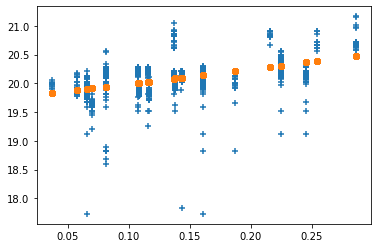

In [119]:
plt.scatter(x, y, marker = '+')
plt.scatter(x, y_p, marker = 'o')
plt.show()

In [120]:
md = smf.ols(formula = "거래금액_로그 ~ 특목자사_비율", data=c)
result = md.fit()
print(result.summary()) #단순회귀분석 결과 출력

                            OLS Regression Results                            
Dep. Variable:                거래금액_로그   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     616.3
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          1.05e-114
Time:                        17:08:59   Log-Likelihood:                -133.97
No. Observations:                1542   AIC:                             271.9
Df Residuals:                    1540   BIC:                             282.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7311      0.016   1238.095      0.0